<a href="https://colab.research.google.com/github/maidyjoshi/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 3 PCVK**

### Nama: Maidy Putri Joshi
### NIM: 2141720060

In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:

𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.

Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


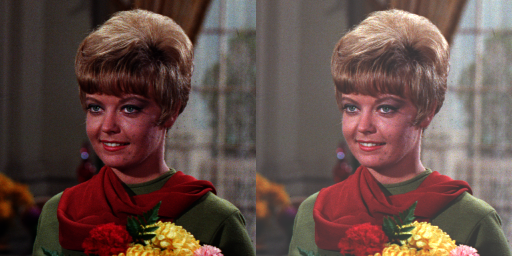

In [9]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread("/content/drive/MyDrive/SEMESTER5/PCVK/female.tiff") # get image from gdrive
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

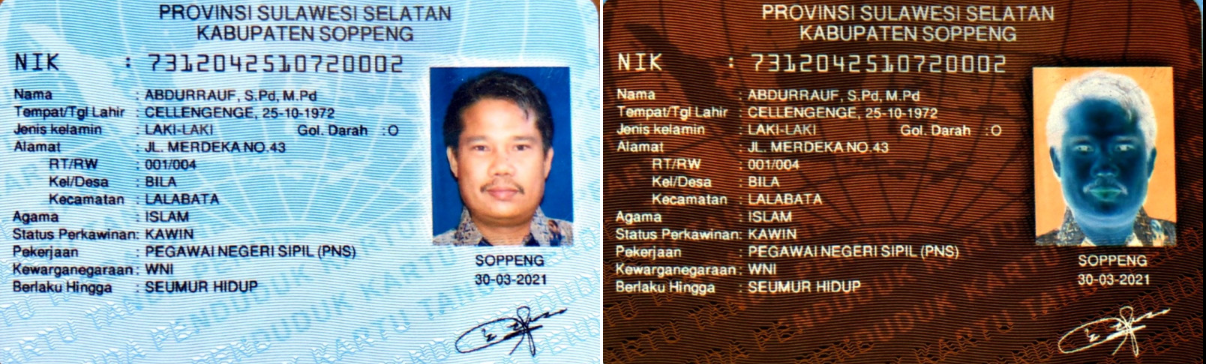

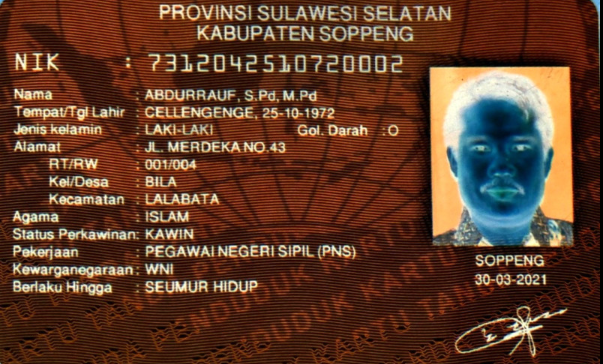

In [13]:
import cv2

# pakai bawaan numpy
path='/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png'
image=cv.imread(path)
inverted_image = cv.bitwise_not(image)

invertedFrame=cv.hconcat((image,inverted_image))
cv2_imshow(invertedFrame)

# pakai rumus
path='/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png'
image = cv.imread(path)
invert = np.zeros(image.shape,image.dtype)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            invert[y,x,c]=np.clip(255 - image[y,x,c] ,0,255)

cv2_imshow(invert)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


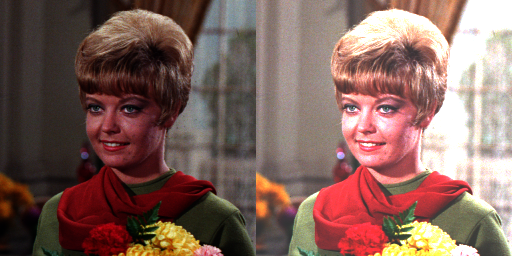

In [15]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


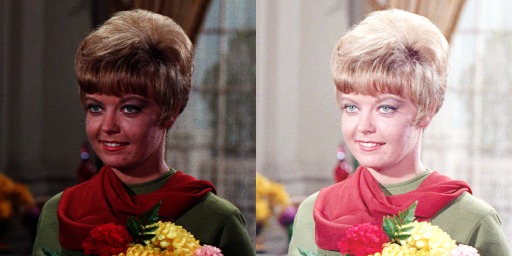

In [16]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


**a. Averaging**

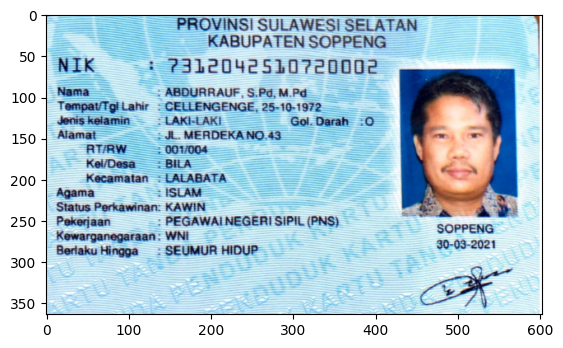

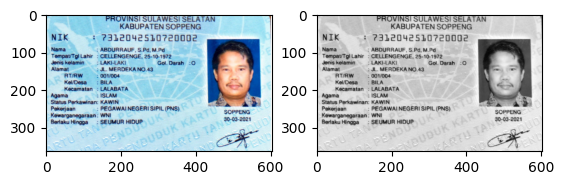

In [17]:
img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

# a. Averaging

img_avg = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png')
img_avg[:] = img_avg.mean(axis=2, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

**b. Lightness**

<ipython-input-21-a63f6ef98c6a>:15: RuntimeWarning: overflow encountered in ubyte_scalars
  lightness = (max(red, green, blue) + min(red, green, blue)) // 2


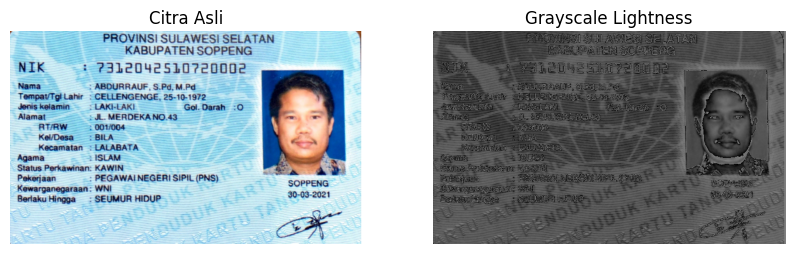

In [21]:
# Fungsi untuk mengubah citra menjadi grayscale lightness
def grayscaleLightness(image):
    # Salin citra asli
    grayscale_image = image.copy()

    # Loop melalui setiap piksel
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Ambil nilai saluran warna (R, G, B) pada setiap piksel
            red = image[y, x, 2]
            green = image[y, x, 1]
            blue = image[y, x, 0]

            # Hitung nilai lightness
            lightness = (max(red, green, blue) + min(red, green, blue)) // 2

            # Atur nilai lightness pada setiap saluran warna (R, G, B)
            grayscale_image[y, x, 0] = lightness
            grayscale_image[y, x, 1] = lightness
            grayscale_image[y, x, 2] = lightness

    return grayscale_image

# Baca citra
path ='/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png'
image = cv.imread(path)

# Konversi citra ke grayscale lightness
grayscale_lightness_image = grayscaleLightness(image)

# Tampilkan citra asli dan citra grayscale lightness
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Citra Asli')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(grayscale_lightness_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Grayscale Lightness')
ax[1].axis('off')
plt.show()

**c. Luminance**

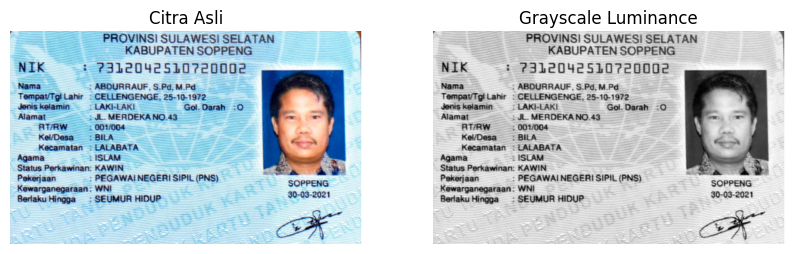

In [22]:
# Fungsi untuk mengubah citra menjadi grayscale luminance
def grayscaleLuminance(image):
    # Salin citra asli
    grayscale_image = image.copy()

    # Hitung luminance untuk setiap piksel
    luminance = 0.21 * image[:, :, 2] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 0]

    # Atur nilai luminance pada setiap saluran warna (R, G, B)
    grayscale_image[:, :, 0] = luminance
    grayscale_image[:, :, 1] = luminance
    grayscale_image[:, :, 2] = luminance

    return grayscale_image

# Baca citra
path = '/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png'
image = cv.imread(path)

# Konversi citra ke grayscale luminance
grayscale_luminance_image = grayscaleLuminance(image)

# Tampilkan citra asli dan citra grayscale luminance
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Citra Asli')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(grayscale_luminance_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Grayscale Luminance')
ax[1].axis('off')
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

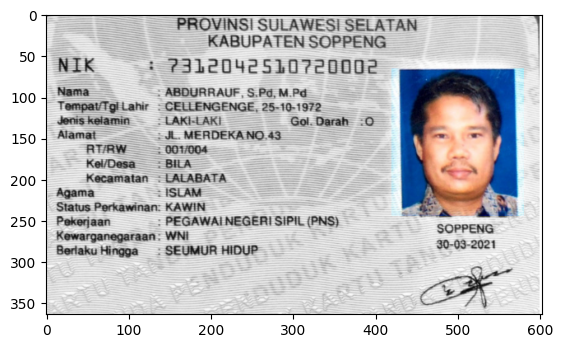

In [43]:
# Baca citra
path = '/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png'
image = cv.imread(path)

# Tentukan koordinat sudut kiri atas dan kanan bawah dari area yang akan dikecualikan dari grayscale
x1, y1 = 420, 66  # Koordinat sudut kiri atas
x2, y2 = 580, 244  # Koordinat sudut kanan bawah

# Salin citra asli ke citra hasil
result_image = image.copy()

# Loop melalui setiap piksel dalam citra
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        # Periksa apakah piksel berada di dalam area yang akan dikecualikan
        if x1 <= x <= x2 and y1 <= y <= y2:
            # Jika dalam area yang akan dikecualikan, salin warna asli dari citra asli
            result_image[y, x] = image[y, x]
        else:
            # Jika di luar area yang akan dikecualikan, konversi piksel menjadi grayscale
            gray_value = np.mean(image[y, x])
            result_image[y, x] = [gray_value, gray_value, gray_value]  # Jadikan piksel menjadi grayscale

# Menampilkan citra hasil dengan menggunakan matplotlib
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
# plt.axis('off')
plt.show()

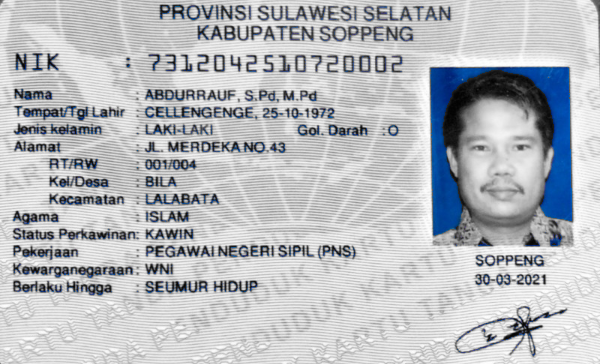

In [44]:
image = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/ktp.png')

# Tentukan batas warna biru dalam format BGR (Blue, Green, Red)
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])

# Dapatkan dimensi citra
height, width, channels = image.shape

# Buat citra grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Inisialisasi citra hasil
final_result = np.zeros_like(image)

# Perulangan untuk mengiterasi melalui semua piksel citra
for y in range(height):
    for x in range(width):
        # Dapatkan nilai warna BGR piksel saat ini
        pixel = image[y, x]

        # Periksa apakah piksel saat ini berada dalam batas warna biru
        if (pixel >= lower_blue).all() and (pixel <= upper_blue).all():
            final_result[y, x] = image[y, x]  # Biarkan piksel biru tetap seperti aslinya
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]  # Ubah bagian non-biru menjadi grayscale

# Tampilkan citra hasil
cv2_imshow(final_result)
cv.waitKey(0)
cv.destroyAllWindows()